# Softmax regression

In [ ]:
import numpy as np
from pprint import pprint

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import log_loss, ConfusionMatrixDisplay, classification_report, make_scorer, f1_score

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure', figsize=(8, 6))

import warnings
warnings.filterwarnings('ignore')

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.datasets import fetch_openml
X_pd, y_pd = fetch_openml('mnist_784', version=1, return_X_y=True)

In [ ]:
X = X_pd.to_numpy()
y = y_pd.to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

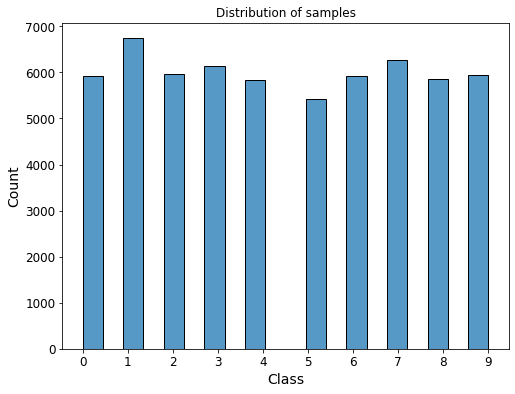

In [ ]:
plt.figure()
sns.histplot(data=np.int8(y_train), binwidth=0.45, bins=11)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9], labels=[0,1,2,3,4,5,6,7,8,9])
plt.xlabel('Class')
plt.title('Distribution of samples')
plt.show()

## Building the model

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(multi_class='multinomial', solver='sag'))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(multi_class='multinomial', solver='sag'))])

In [ ]:
pipe[-1].coef_.shape

(10, 784)

In [ ]:
pipe[-1].intercept_.shape

(10,)

In [ ]:
pipe[-1].classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

## Model evaluation

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.90      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.91      0.87      0.89       892
           6       0.93      0.95      0.94       958
           7       0.92      0.93      0.92      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



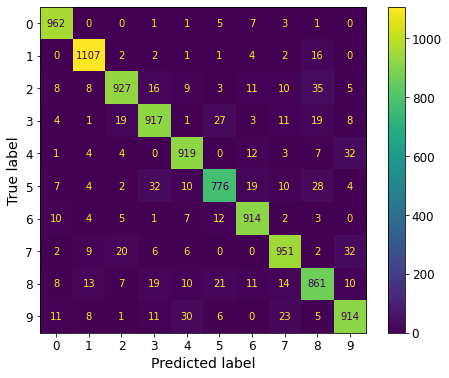

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)

Following is an attempt to cross-validate the same regression model, but it takes more than 3 hours to finish.  For now, just commenting out the lines.

In [ ]:
# scorer = make_scorer(f1_score, average='micro')
# pipe = Pipeline([('scaler', StandardScaler()), ('logreg', 
#                                                 LogisticRegressionCV(cv=5, multi_class='multinomial', solver='sag', 
#                                                                      scoring=scorer, max_iter=100, random_state=1729))])
# pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegressionCV(cv=5, multi_class='multinomial',
                                      random_state=1729,
                                      scoring=make_scorer(f1_score, average=micro),
                                      solver='sag'))])

Checking the best hyperparameters that resulted from the cross-validation

In [ ]:
# pipe[-1].C_

In [ ]:
# pipe[-1].l1_ratio_

In [ ]:
# print(classification_report(y_test, pipe.predict(X_test)))

In [ ]:
# ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)

# KNN for hand-written digits recognition

In [40]:
import numpy as np
from pprint import pprint

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, RandomizedSearchCV, GridSearchCV, cross_val_predict, learning_curve
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure', figsize=(8, 6))

import warnings
warnings.filterwarnings('ignore')


In [27]:
np.random.seed(42)

In [28]:
from sklearn.datasets import fetch_openml
X_pd, y_pd = fetch_openml('mnist_784', version=1, return_X_y=True)

In [29]:
X = X_pd.to_numpy()
y = y_pd.to_numpy()

In [30]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [31]:
#initialize new variable names with all -1
y_train_0 = -1 * np.ones(y_train.shape[0])
y_test_0 = -1 * np.ones(y_test.shape[0])

#find indices of digit 0 image
indx_0 = np.where(y_train == '0')
y_train_0[indx_0] = 1
indx_0 = np.where(y_test == '0')
y_test_0[indx_0] = 1

print(y_train)
print(y_train_0)

['5' '0' '4' ... '5' '6' '8']
[-1.  1. -1. ... -1. -1. -1.]


## Using PCA to reduce dimensions

#### to two features

In [32]:
pipe_pca_2d = make_pipeline(MinMaxScaler(), PCA(n_components=2))
X_train_pca_2d = pipe_pca_2d.fit_transform(X_train)

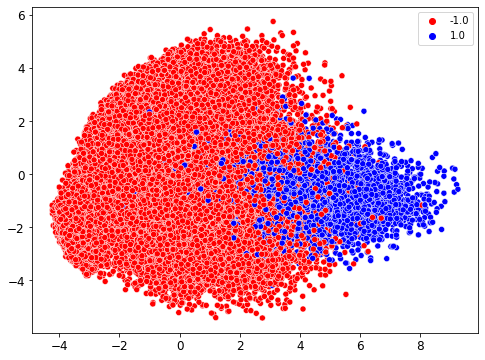

In [33]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['r', 'b'])
sns.scatterplot(x = X_train_pca_2d[:, 0], y = X_train_pca_2d[:, 1], hue=y_train_0, palette=cmap)

#### to three features

In [34]:
pipe_pca_3d = make_pipeline(MinMaxScaler(), PCA(n_components=3))
X_train_pca_3d = pipe_pca_3d.fit_transform(X_train)

In [ ]:
# Commenting out, since this could impact the rendering of the notebook.

# from matplotlib.colors import ListedColormap
# import plotly.express as px
# cmap = ListedColormap(['r', 'b'])
# px.scatter_3d(x = X_train_pca_3d[:, 0], y = X_train_pca_3d[:, 1], z = X_train_pca_3d[:, 2], 
#               color=y_train_0, color_discrete_map=cmap, opacity=0.5)

## Train KNN classifier

In [ ]:
pipe_clf_pca_2d = make_pipeline(pipe_pca_2d, KNeighborsClassifier(n_neighbors=3))

In [ ]:
# Train 10 samples (first 5 from negative class and last 5 from positive class)
index_neg = np.argsort(y_train_0)[:5]
index_pos = np.argsort(y_train_0)[-1:-6:-1]
print(f"Positive classes: {y_train_0[index_pos]}")
print(f"Negative classes: {y_train_0[index_neg]}")

Positive classes: [1. 1. 1. 1. 1.]
Negative classes: [-1. -1. -1. -1. -1.]


In [ ]:
# Create a small dataset
X = np.vstack((X_train[index_pos, :], X_train[index_neg, :]))
y = np.hstack((y_train_0[index_pos], y_train_0[index_neg]))
print(X.shape, y.shape)

(10, 784) (10,)


In [ ]:
pipe_clf_pca_2d.fit(X, y)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                 ('pca', PCA(n_components=2))])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

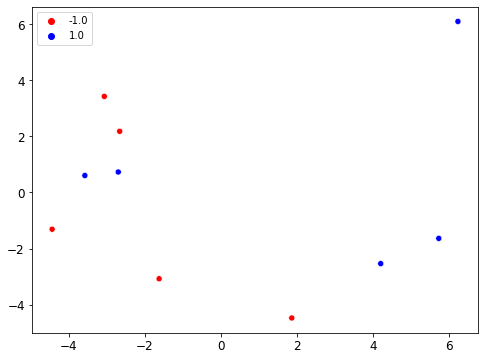

In [ ]:
# Plot them X (after applying PCA) with corresponding y.
X_reduced = pipe_clf_pca_2d[0].transform(X)

cmap = ListedColormap(['r', 'b'])
sns.scatterplot(X_reduced[:, 0], y=X_reduced[:, 1], marker='o', hue=y, palette=cmap)

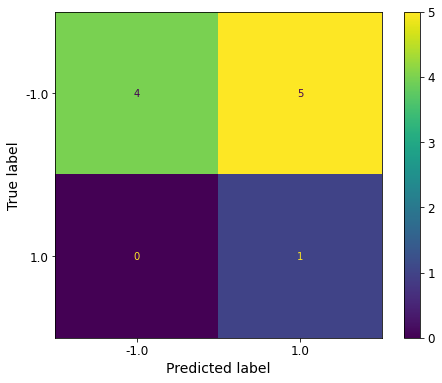

In [35]:
# Predict from the model
y_hat_0 = pipe_clf_pca_2d.predict(X_test[:10, :])
ConfusionMatrixDisplay.from_predictions(y_test_0[:10], y_hat_0)

## Without PCA

In [ ]:
pipe_knn = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=1))

grid_k = {'kneighborsclassifier__n_neighbors': [1,3,5,7,9,11]}
cv = GridSearchCV(pipe_knn, param_grid=grid_k, scoring='precision', cv=5)
cv.fit(X_train, y_train_0)
print(cv)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_neighbors=1))]),
             param_grid={'kneighborsclassifier__n_neighbors': [1, 3, 5, 7, 9,
                                                               11]},
             scoring='precision')


In [22]:
cv.cv_results_

{'mean_fit_time': array([0.75396981, 0.47692847, 0.47866583, 0.47449985, 0.47726502,
        0.47981772]),
 'mean_score_time': array([29.57819567, 31.30119276, 35.07689075, 34.94374118, 34.97769685,
        35.14205675]),
 'mean_test_score': array([0.97805545, 0.98229094, 0.98212333, 0.98245498, 0.98111657,
        0.98078408]),
 'param_kneighborsclassifier__n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 11],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kneighborsclassifier__n_neighbors': 1},
  {'kneighborsclassifier__n_neighbors': 3},
  {'kneighborsclassifier__n_neighbors': 5},
  {'kneighborsclassifier__n_neighbors': 7},
  {'kneighborsclassifier__n_neighbors': 9},
  {'kneighborsclassifier__n_neighbors': 11}],
 'rank_test_score': array([6, 2, 3, 1, 4, 5], dtype=int32),
 'split0_test_score': array([0.97920133, 0.98493724, 0.98166667, 0.98086522, 0.97921862,
        0.97921862]),
 'split1_test_score': ar

In [23]:
cv.best_params_

{'kneighborsclassifier__n_neighbors': 7}

In [24]:
pipe_knn = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=7))
pipe_knn.fit(X_train, y_train_0)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=7))])

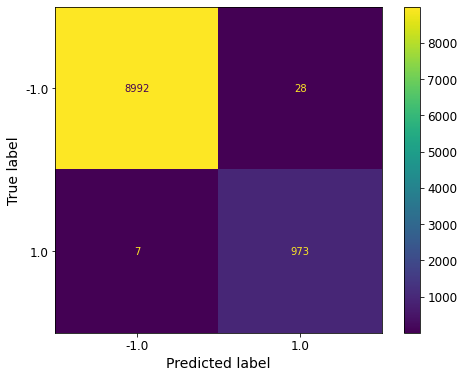

In [36]:
y_hat_0 = pipe_knn.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test_0, y_hat_0)

# Multiclass classifier

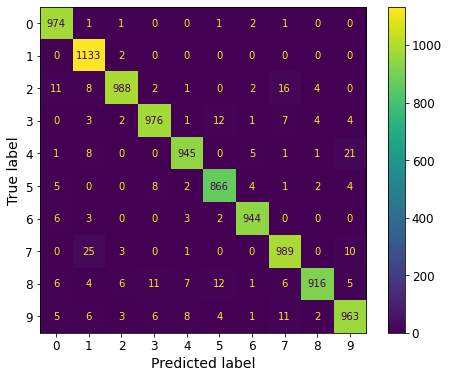

In [37]:
pipe_knn.fit(X_train, y_train)  #reuse the pipe created earlier
y_hat = pipe_knn.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

In [38]:
pipe_knn.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [41]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.95      1.00      0.97      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

